In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
DATA_FOLDER = 'data'
RESULTS_FOLDER = 'write'

results_file = f'{RESULTS_FOLDER}/gse75688.h5ad'

# Reading Dataset

In [3]:
df_info = pd.read_csv(f'{DATA_FOLDER}/GSE75688_final_sample_information.txt.gz', sep='\t')
df_info = df_info.rename(columns={'index': 'is_tumor'})
df_info

,sample,type,is_tumor,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


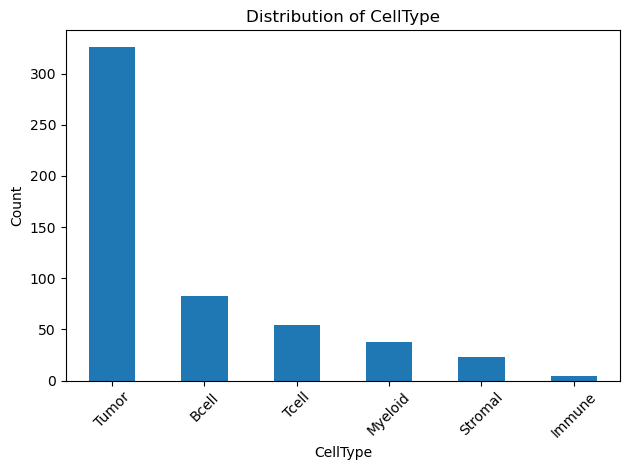

In [5]:
df_info['index3'].value_counts().plot(kind='bar', rot=45)
plt.xlabel('CellType')
plt.ylabel('Count')
plt.title('Distribution of CellType')
plt.tight_layout()
plt.show()

In [6]:
list(df_info['sample'])

['BC01_02',
 'BC01_03',
 'BC01_04',
 'BC01_05',
 'BC01_06',
 'BC01_08',
 'BC01_10',
 'BC01_12',
 'BC01_33',
 'BC01_34',
 'BC01_50',
 'BC01_53',
 'BC01_55',
 'BC01_57',
 'BC01_66',
 'BC01_69',
 'BC01_70',
 'BC01_72',
 'BC01_74',
 'BC01_77',
 'BC01_87',
 'BC01_95',
 'BC01_Pooled',
 'BC04_01',
 'BC04_02',
 'BC04_07',
 'BC04_08',
 'BC04_09',
 'BC04_11',
 'BC04_13',
 'BC04_14',
 'BC04_16',
 'BC04_20',
 'BC04_21',
 'BC04_22',
 'BC04_23',
 'BC04_24',
 'BC04_27',
 'BC04_28',
 'BC04_29',
 'BC04_30',
 'BC04_31',
 'BC04_32',
 'BC04_33',
 'BC04_35',
 'BC04_36',
 'BC04_37',
 'BC04_39',
 'BC04_40',
 'BC04_41',
 'BC04_45',
 'BC04_49',
 'BC04_53',
 'BC04_54',
 'BC04_56',
 'BC04_58',
 'BC04_59',
 'BC04_60',
 'BC04_61',
 'BC04_62',
 'BC04_63',
 'BC04_64',
 'BC04_66',
 'BC04_69',
 'BC04_71',
 'BC04_72',
 'BC04_77',
 'BC04_78',
 'BC04_82',
 'BC04_85',
 'BC04_86',
 'BC04_88',
 'BC04_89',
 'BC04_90',
 'BC04_91',
 'BC04_92',
 'BC04_93',
 'BC04_96',
 'BC04_Pooled',
 'BC07_01',
 'BC07_03',
 'BC07_04',
 'BC07_0

In [12]:
df_info['is_tumor'].value_counts()

is_tumor
Tumor       326
nonTumor    202
Name: count, dtype: int64

In [13]:
df = pd.read_csv(f'{DATA_FOLDER}/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt.gz', sep='\t')
df

,gene_id,gene_name,gene_type,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,ENSG00000000003.10,TSPAN6,protein_coding,2.33,1.25,43.96,7.64,9.32,133.37,84.77,...,0.00,47.44,16.11,0.00,6.56,0.00,0.00,0.00,200.82,0.00
1,ENSG00000000005.5,TNMD,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,DPM1,protein_coding,60.70,28.44,74.73,41.41,87.69,120.41,70.67,...,198.96,0.00,0.00,20.63,0.00,0.00,0.00,136.07,22.03,204.58
3,ENSG00000000457.9,SCYL3,protein_coding,47.93,4.43,9.89,7.61,7.32,12.42,12.02,...,0.00,10.96,0.00,0.00,0.00,0.27,0.00,0.07,0.19,9.52
4,ENSG00000000460.12,C1orf112,protein_coding,4.79,1.67,10.87,0.92,15.13,17.10,5.69,...,0.00,6.97,9.02,0.00,0.00,0.14,247.69,22.60,11.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,ERCC-00170,ERCC-00170,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57911,ERCC-00171,ERCC-00171,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57912,SPIKE1,EC2,SPIKE_IN,14940.70,45728.19,10442.91,94250.71,40823.13,24540.58,12613.85,...,166346.51,54443.35,120842.89,135291.06,138048.60,58840.26,65246.34,33465.11,108901.35,57492.01
57913,SPIKE2,EC15,SPIKE_IN,985.82,607.50,362.55,2949.35,1291.13,854.53,399.57,...,6860.84,2136.69,4048.09,4062.59,4147.05,2286.91,2821.49,1652.19,3439.53,1837.41


In [49]:
df.columns

Index(['gene_id', 'gene_name', 'gene_type', 'BC01_Pooled', 'BC01_Tumor',
       'BC02_Pooled', 'BC03_Pooled', 'BC03LN_Pooled', 'BC04_Pooled',
       'BC05_Pooled',
       ...
       'BC11_04', 'BC11_07', 'BC11_28', 'BC11_43', 'BC11_56', 'BC11_69',
       'BC11_70', 'BC11_78', 'BC11_81', 'BC11_88'],
      dtype='object', length=566)

## Creating X and Y

In [26]:
# Selecting columns representing cells
samples = df.loc[:,'BC01_02':]

len(samples.T)

549

In [28]:
# Renaming columns with gene names
columns = samples.T.columns.values
gene_name_list = list(df['gene_name'])
columns_mapping = dict(zip(columns, gene_name_list))
samples = samples.T.rename(columns=columns_mapping)

In [41]:
# Merging features (gene expressions) and labels (index = is_cancer)
labels = df_info.set_index(df_info['sample'])['is_tumor']
samples = samples.merge(labels.to_frame(), left_index=True, right_index=True)
samples[:5]

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18,is_tumor
BC01_02,0.0,0.0,50.73,3.28,0.00,0.0,0.00,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,18414.34,537.11,0.0,Tumor
BC01_03,0.0,0.0,120.46,0.81,13.42,0.0,0.00,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,19603.44,653.27,0.0,Tumor
BC01_04,0.0,0.0,6.97,92.23,0.34,0.0,0.00,0.00,108.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,28523.94,916.42,0.0,Tumor
BC01_05,0.0,0.0,180.85,6.44,0.26,0.0,0.00,0.00,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,31210.57,961.37,0.0,Tumor
BC01_06,0.0,0.0,32.09,59.78,0.00,0.0,0.33,8.42,52.59,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,48684.49,2052.48,0.0,Tumor


In [43]:
def get_patient_id_for_each_sample(x: pd.DataFrame):
    pattern = r'^BC(\d+)'
    indexes = x.index.values
    return [re.search(pattern, label).group(1) for label in indexes]

In [44]:
def get_cancer_types(patient_ids: list):
    cancer_types = []
    for id in patient_ids:
        if id in ('01', '02'):
            cancer_types.append('ER+')
        elif id in ('03'):
            cancer_types.append('ER+ and HER2+')
        elif id in ('04', '05', '06'):
            cancer_types.append('HER2+')
        else:
            cancer_types.append('TNBC')
    return cancer_types

def count_samples_per_class_by_cancer_type(samples: pd.DataFrame):
    patient_ids = get_patient_id_for_each_sample(samples)
    cancer_types = get_cancer_types(patient_ids)
    return pd.DataFrame({
        'is_tumor': samples['is_tumor'].values,
        'patient_id': patient_ids,
        'cancer_type': cancer_types
    })
    
table1_df = count_samples_per_class_by_cancer_type(samples)
table1_df[['is_tumor', 'cancer_type']].groupby('cancer_type').value_counts()

cancer_type    is_tumor
ER+            Tumor        73
               nonTumor      2
ER+ and HER2+  nonTumor     61
               Tumor        25
HER2+          Tumor       130
               nonTumor     19
TNBC           nonTumor    116
               Tumor        89
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribuiçao da variável-alvo em samples')

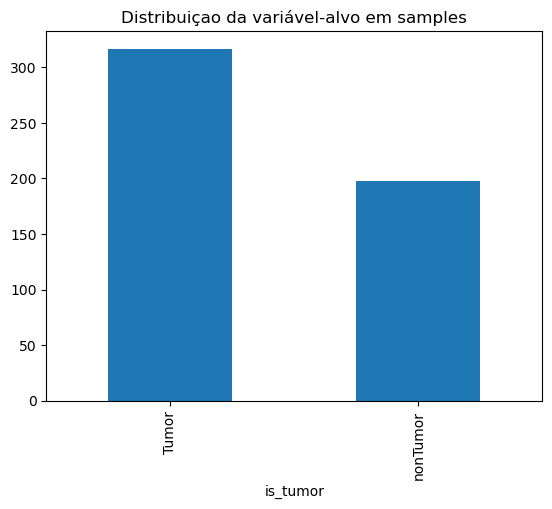

In [47]:
samples['is_tumor'].value_counts().plot(kind='bar')
plt.title('Distribuiçao da variável-alvo em samples')

In [48]:
x = samples.iloc[:,:-1]
y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0})
patients = get_patient_id_for_each_sample(x)

C:\Users\parai\AppData\Local\Temp\ipykernel_4428\3396921594.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0})


In [17]:
y.value_counts()

1    317
0    198
Name: is_tumor, dtype: int64

# Non-supervised Clustering

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, homogeneity_score, normalized_mutual_info_score, rand_score
# from sklearn.model_selection import train_test_split, StratifiedGroupKFold, GroupShuffleSplit
from sklearn.pipeline import Pipeline

In [51]:
random_state = 42

In [52]:
# Returns dataset before transformations
def get_dataset():
    x = samples.iloc[:,:-1]
    y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0}) # reversing 0s and 1s to test how accuracy and f1 change if values are flipped
    patients = get_patient_id_for_each_sample(x)
    return x, y, patients

In [53]:
metrics = [
    ('Accuracy', accuracy_score),
    ('F1', f1_score),
    ('NMI', normalized_mutual_info_score),
    ('RI', rand_score)
]

## Pipeline 1

1. StandardScaler
2. PCA(n_components)
3. KMeans(k=2)

### Defining number of PCA components

In [55]:
x_original, y_original, patients = get_dataset()

C:\Users\parai\AppData\Local\Temp\ipykernel_4428\715075668.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0}) # reversing 0s and 1s to test how accuracy and f1 change if values are flipped


In [ ]:
scaler = StandardScaler()
scaler.fit(x_original)
X_scaled = scaler.transform(x_original)
X_scaled.shape

# Running PCA with max number of components allowed: min(x_samples, x_features)
pca_elbow = PCA(random_state=random_state)
pca_elbow.fit(X_scaled)

PCA(random_state=42)

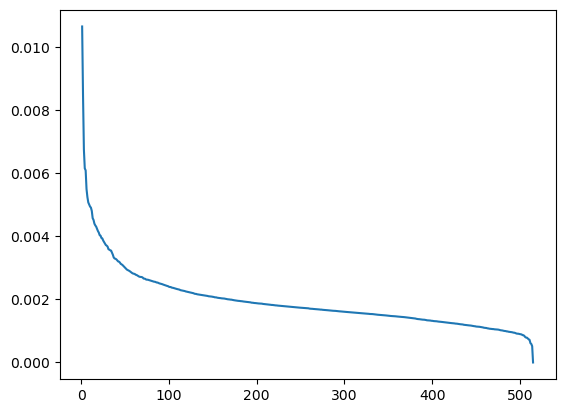

In [57]:
variance = pca_elbow.explained_variance_ratio_
number_of_components = np.arange(1, variance.shape[0]+1)
plt.plot(number_of_components, variance)

In [59]:
# Gets the number of components that explain 90% of the variance
def get_number_of_components_by_variance(variance_percentages, target_variance=0.9):
    i = 0
    acc = 0
    while acc < target_variance:
        acc += variance_percentages[i]
        i += 1
    return i

n_components = get_number_of_components_by_variance(pca_elbow.explained_variance_ratio_)
print(f'Number of PCA components to be used: {n_components}')

Number of PCA components to be used: 419


### KMeans

In [72]:
pca_n_components = n_components
kmeans_n_clusters = 2

In [73]:
# Pipeline
x, y, patients = get_dataset()
p1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])
p1

C:\Users\parai\AppData\Local\Temp\ipykernel_4428\715075668.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0}) # reversing 0s and 1s to test how accuracy and f1 change if values are flipped


Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=419, random_state=42)),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [74]:
# Clustering
labels = p1.fit_predict(x)

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [75]:
print("Results")
for name, metric in metrics:
    try:
        score = metric(y, labels)
    except Exception as e:
        score = f"Error: {e}"
    print(f"{name}: {score:.4f}")

Results
Accuracy: 0.3864
F1: 0.0063
NMI: 0.0028
RI: 0.5249


### Ablation

#### Removing Scaler

In [77]:
p1_without_scaler = Pipeline([
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

In [78]:
# Clustering
labels = p1_without_scaler.fit_predict(x)

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
print("Results (no Scaler)")
for name, metric in metrics:
    try:
        score = metric(y, labels)
    except Exception as e:
        score = f"Error: {e}"
    print(f"{name}: {score:.4f}")
    
# Accuracy reduction, but overall improved performance

Results (no Scaler)
Accuracy: 0.2466
F1: 0.1142
NMI: 0.1800
RI: 0.6277


#### Removing PCA

In [80]:
p1_without_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

In [81]:
# Clustering
labels = p1_without_pca.fit_predict(x)

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [ ]:
print("Results (no PCA)")
for name, metric in metrics:
    try:
        score = metric(y, labels)
    except Exception as e:
        score = f"Error: {e}"
    print(f"{name}: {score:4f}")

# Overall improved performance, except for NMI score

Results (no PCA)
Accuracy: 0.5883495145631068
F1: 0.7408312958435208
NMI: 0.03395125303139963
RI: 0.5146688829284878


#### Removing Scaler and PCA

In [83]:
p1_without_scaler_and_pca = Pipeline([
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

In [84]:
# Clustering
labels = p1_without_pca.fit_predict(x)

c:\Users\parai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [86]:
print("Results (just KMeans)")
for name, metric in metrics:
    try:
        score = metric(y, labels)
    except Exception as e:
        score = f"Error: {e}"
    print(f"{name}: {score:4f}")

Results (just KMeans)
Accuracy: 0.588350
F1: 0.740831
NMI: 0.033951
RI: 0.514669


### Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

# Fit pipeline up to PCA on training data
p2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('spectral', SpectralClustering(n_clusters=2, random_state=random_state, assign_labels='discretize', affinity='nearest_neighbors'))
])
p2


Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=419, random_state=42)),
                ('spectral',
                 SpectralClustering(affinity='nearest_neighbors',
                                    assign_labels='discretize', n_clusters=2,
                                    random_state=42))])

In [89]:
labels = p2.fit_transform(x)

print("Results - Spectral")
for name, metric in metrics:
    try:
        score = metric(y, labels)
    except Exception as e:
        score = f"Error: {e}"
    print(f"{name}: {score:.4f}")

AttributeError: This 'Pipeline' has no attribute 'fit_transform'